In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#To view the statistical data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']

In [10]:
#To check for missing values
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

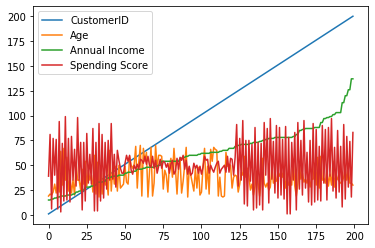

In [11]:
data.plot()

## Observations
 
The income of customers is increasing. The age is distributed. The spending score is two-edged. A sparse spread at the beginning (0 to 40) and another spread at the end (60 to 100).

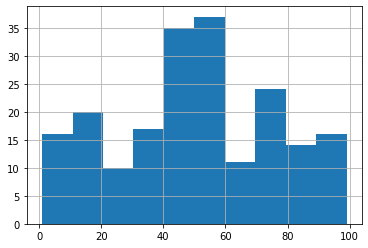

In [12]:
data['Spending Score'].hist()

The highest spending score is between 40 to 60.

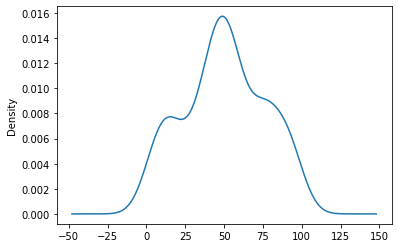

In [13]:
 data['Spending Score'].plot(kind='kde')

In [14]:
def draw_histograms(variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        data[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

Text(0.5, 0, 'Spending Score')

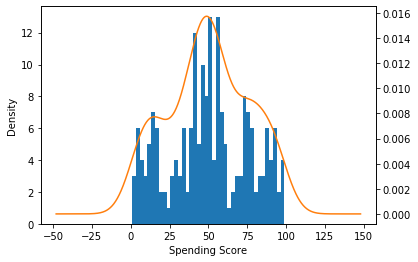

In [15]:
ax = data['Spending Score'].plot(kind='hist', bins=40)
data['Spending Score'].plot(kind='kde', ax=ax, secondary_y=True)
ax.set_xlabel('Spending Score')

 The spending score follows a normal distribution.

In [16]:
data.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

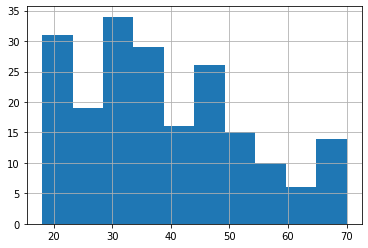

In [17]:
data['Age'].hist()

Stores top customers are between 18 and 50 years old. With the highest number of people between 28 and 34.

Text(0.5, 0, 'Age')

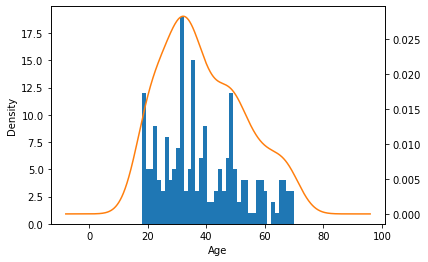

In [18]:
ax = data['Age'].plot(kind='hist', bins=40)
data['Age'].plot(kind='kde', ax=ax, secondary_y=True)
ax.set_xlabel('Age')

The age column follows a normal distribution skewed to the left.

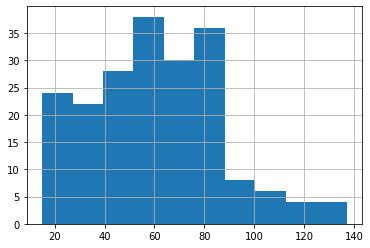

In [19]:
data['Annual Income'].hist()

Highest income between 50,000 to 85,000 dollars

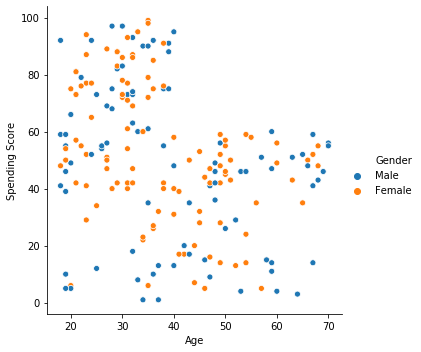

In [20]:
# plot age vs spending score, hue is gender
sns.relplot(x="Age", y="Spending Score", hue="Gender", data=data);

The spending seems to be spread across all gender. So there is no gender gap amongst the store customers. However, the spending score tends to be higher for age < 40.
Thus, the ages 18 to 40 has a better spending score (than above 60).

A technical view of the segments:
* 18 to 40
* 30 to 55
* 55 to 70

* Looking at the plot above, the spending score for ages 18 to 30 has more values from 35 and above. 
* The ages 31 to 40 has spending score almost evenly spread from lowest to highest. 
* The ages 41 to 45 has an evenly spread spending score
* 45 to 50 has an almost even spread except for the concentration around 40 to 60
* 51 to 60 can be regarded as regular customers to the score as their spending ecore is evenly spread.
* The ages 60 to 70 concentrates more on the score around 40 to 60.

It can be said that the highest purchasing customers are between the ages 18 to 40. However, looking at the range of people withing the demographics, more info is required (based on purchase behaviour and psychographics) to know how best to target each segment created so far.

In [21]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female':0})

In [22]:
data.corr()

,CustomerID,Gender,Age,Annual Income,Spending Score
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income,0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score,0.013835,-0.058109,-0.327227,0.009903,1.000000


Age impacts all. The higher the age, the lesser the annual income and spending score.

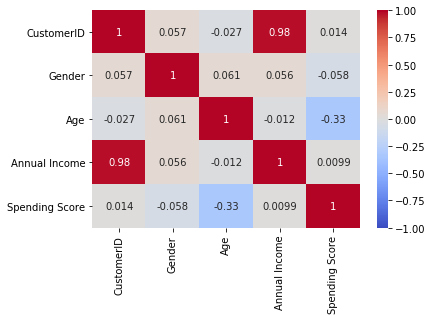

In [23]:
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [24]:
data[data['Age'].between (18,40)]['Spending Score'].count()

122

In [25]:
data[data['Age'].between (18,40)]['Spending Score'].sum()

7234

In [26]:
data[data['Age'].between (41,60)]['Spending Score'].count()

61

In [27]:
data[data['Age'].between (41,60)]['Spending Score'].sum()

2055

In [28]:
data[data['Age'] > 60]['Spending Score'].count()

17

In [29]:
data[data['Age'] > 60]['Spending Score'].sum()

751

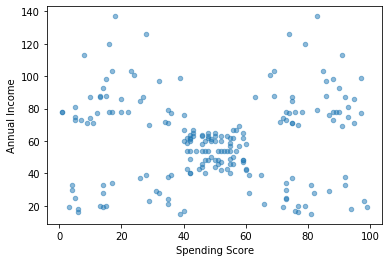

In [30]:
data.plot(kind="scatter", y="Annual Income", x="Spending Score", alpha=0.5)

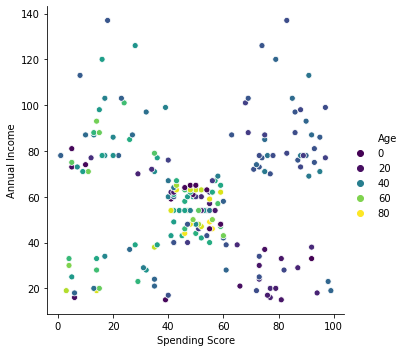

In [31]:
# plot spending score vs annual income, hue is Age
sns.relplot(x="Spending Score", y="Annual Income", hue="Age", data=data, palette="viridis")

Based on income vs spending score:
* The spending score of 18 to 40 are those earning between 0 to 40 and 70 to 140
* The spending score between 40 to 60 is from those earning between 40 to 70 in income.
* Spending score 60 to 100 goes to those who earn just like those in 0 to 40.

The highest spending score is between 40 to 60. That region is a representative of all the age groups.

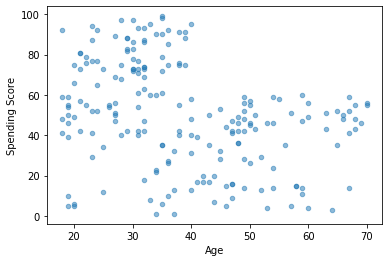

In [32]:
data.plot(kind="scatter", x="Age", y="Spending Score", alpha=0.5)

In [33]:
def plot(x,y):
  data[data['Age'].between (x,y)]['Spending Score'].plot()

## We would not need the last 3 graphs anymore

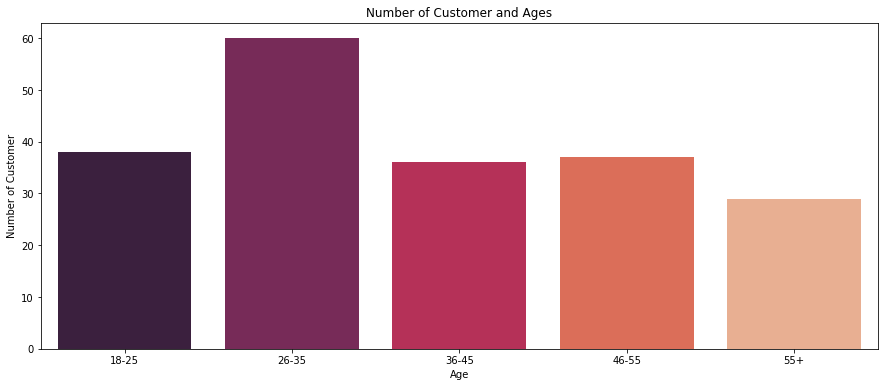

In [34]:
age18_25 = data.Age[(data.Age >= 18) & (data.Age <= 25)]
age26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age55above = data.Age[data.Age > 55]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

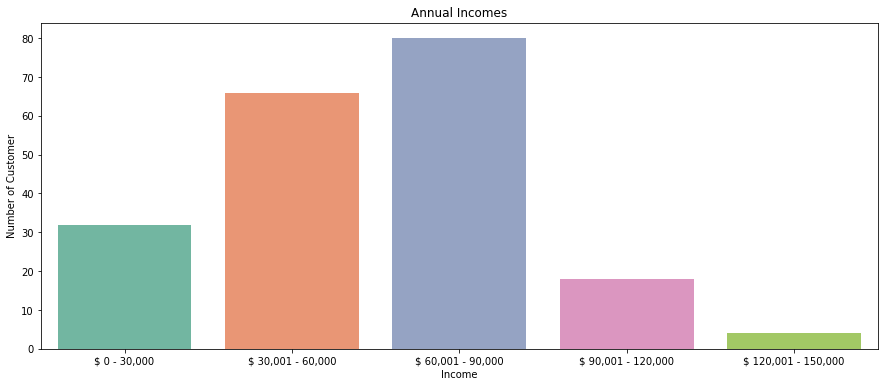

In [35]:
ai0_30 = data["Annual Income"][(data["Annual Income"] >= 0) & (data["Annual Income"] <= 30)]
ai31_60 = data["Annual Income"][(data["Annual Income"] >= 31) & (data["Annual Income"] <= 60)]
ai61_90 = data["Annual Income"][(data["Annual Income"] >= 61) & (data["Annual Income"] <= 90)]
ai91_120 = data["Annual Income"][(data["Annual Income"] >= 91) & (data["Annual Income"] <= 120)]
ai121_150 = data["Annual Income"][(data["Annual Income"] >= 121) & (data["Annual Income"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

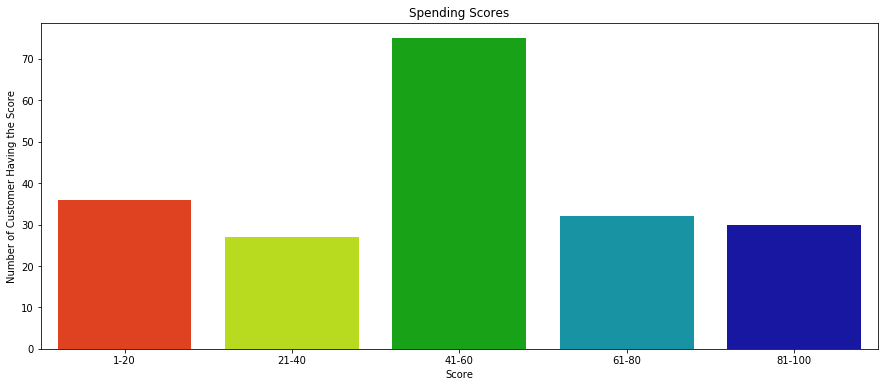

In [36]:
ss1_20 = data["Spending Score"][(data["Spending Score"] >= 1) & (data["Spending Score"] <= 20)]
ss21_40 = data["Spending Score"][(data["Spending Score"] >= 21) & (data["Spending Score"] <= 40)]
ss41_60 = data["Spending Score"][(data["Spending Score"] >= 41) & (data["Spending Score"] <= 60)]
ss61_80 = data["Spending Score"][(data["Spending Score"] >= 61) & (data["Spending Score"] <= 80)]
ss81_100 = data["Spending Score"][(data["Spending Score"] >= 81) & (data["Spending Score"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

## Clustering Analysis

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
X = data.iloc[:, 1:]

In [39]:
sc = StandardScaler()
sc_X = sc.fit_transform(X)

In [40]:
n = 5

In [41]:
# Make k-means clusterer
cluster = KMeans(n_clusters=n, max_iter=600, random_state=1)

# Fit clusterer
cluster.fit(sc_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [42]:
# Observing the outputs and cluster performance
cluster.labels_

array([4, 4, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 4, 2, 4, 3, 1, 3, 4,
       2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 3, 4, 2, 1, 2, 1, 2, 1, 2, 4, 3, 1,
       2, 1, 2, 1, 1, 1, 2, 4, 1, 3, 2, 3, 2, 3, 1, 3, 3, 4, 2, 2, 3, 4,
       2, 2, 4, 1, 3, 2, 2, 2, 3, 4, 2, 3, 1, 2, 3, 4, 3, 2, 1, 3, 2, 1,
       1, 2, 2, 4, 3, 2, 1, 4, 2, 1, 3, 4, 1, 2, 3, 4, 3, 1, 2, 3, 3, 3,
       3, 1, 2, 4, 1, 1, 2, 2, 2, 2, 4, 2, 1, 4, 1, 1, 3, 4, 3, 4, 0, 4,
       1, 1, 0, 1, 2, 4, 0, 1, 2, 4, 1, 1, 0, 4, 3, 1, 2, 4, 0, 4, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 4, 0, 4, 0, 4, 2, 1,
       0, 4, 0, 4, 0, 1, 0, 1, 2, 4, 2, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 4])

In [43]:
cluster.cluster_centers_

array([[ 0.67029819, -0.03490471,  1.21566162, -1.39298818],
       [-0.88640526, -0.75047453, -0.00501655,  0.6979562 ],
       [-0.88640526,  0.69184496, -0.28856088, -0.55050496],
       [ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [ 1.12815215, -0.76072691,  0.05496398,  0.83369302]])

In [44]:
y_cluster = cluster.predict(X)

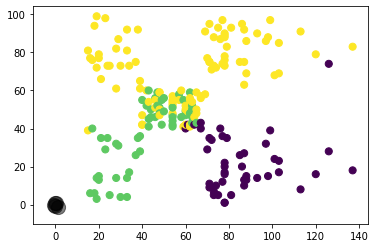

In [45]:
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y_cluster, s=50, cmap='viridis')

centers = cluster.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5);

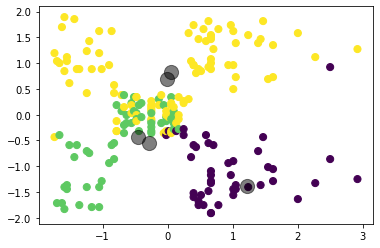

In [46]:
plt.scatter(sc_X[:, 2], sc_X[:, 3], c=y_cluster, s=50, cmap='viridis')

centers = cluster.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5);

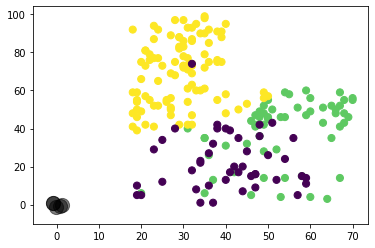

In [47]:
plt.scatter(X.iloc[:, 1], X.iloc[:, 3], c=y_cluster, s=50, cmap='viridis')

centers = cluster.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 3], c='black', s=200, alpha=0.5);

Scaling gave our model a poor performance so we tried clustering on different models without scaling and it turned out best. The best of our model thus came without the scaling factor.

## One more KMeans without scaling

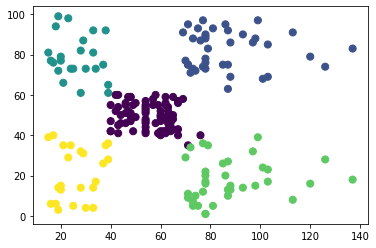

In [48]:
kmeans = KMeans(n_clusters=5, max_iter=600, random_state=1)
km = kmeans.fit(X)
yk = km.predict(X)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=yk, s=50, cmap='viridis')

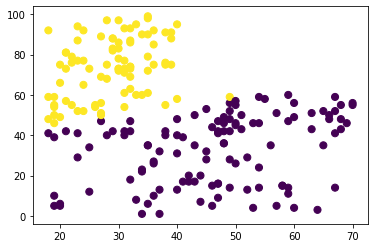

In [49]:
kmeans = KMeans(n_clusters=2, max_iter=600, random_state=1)
km1 = kmeans.fit(X)
yk1 = km1.predict(X)
plt.scatter(X.iloc[:, 1], X.iloc[:, 3], c=yk1, s=50, cmap='viridis')

In [52]:
silhouette_score(X, km.labels_)

0.4440669204743008

In [53]:
silhouette_score(X, km1.labels_)

0.29307334005502633

## Ignore these lines below
Trying to cross-check with other clustering algorithms to know why kmeans is doing poorly.

## Using SpectralClustering

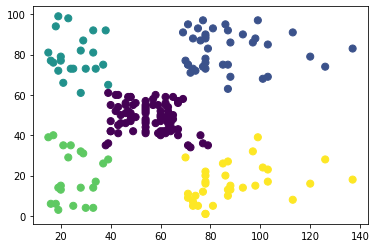

In [54]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=labels, s=50, cmap='viridis')

SpectralClustering was in close performance with GMM on income vs spending score but performed poorly in terms og age vs spending score clustering.

## GaussianMixture Clustering

In [55]:
from sklearn.mixture import GaussianMixture

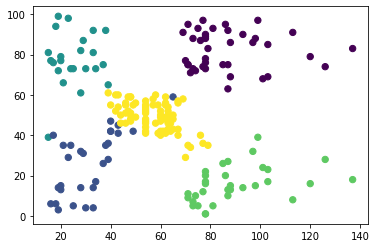

In [56]:
gmm = GaussianMixture(n_components=5).fit(X)
label = gmm.predict(X)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=label, s=40, cmap='viridis');

The GMM clustering above worked perfectly as the eye would scale using a cluster component of 5 for the age versus spending score clustering.

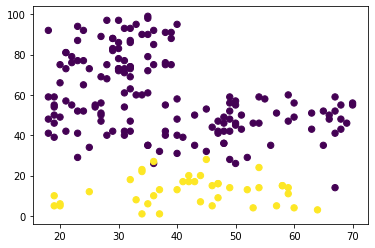

In [57]:
gmm_ = GaussianMixture(n_components=2).fit(X)
label_ = gmm_.predict(X)
plt.scatter(X.iloc[:, 1], X.iloc[:, 3], c=label_, s=40, cmap='viridis');

GMM also did well clustering the age in 2 factions. However, the eye test predicted a 3 factions clustering.

In [58]:
# GMM: income vs score
print ("gmm: silhouttte: ", silhouette_score(X, label))

gmm: silhouttte:  0.4070773637686861


In [59]:
# Spectral Clustering: income vs spending score
from sklearn.metrics import accuracy_score
acc=accuracy_score(labels, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 1.0


In [60]:
# GMM: age vs score
# GMM: income vs score
print ("gmm: silhouttte: ", silhouette_score(X, label_))

gmm: silhouttte:  0.3249135155093505


In [61]:
# plot gender(x) vs spending score (y)
>>> silhouette_score(X, model.labels_)

0.4460786108910301

In [62]:
silhouette_score(X, kmeans.labels_)

0.29307334005502633